#  Proportion Test <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Gyro A. Madrona<br>
Department: Electrical Engineering

In [301]:
# imports and packages
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest,proportions_chisquare,proportion_effectsize
from statsmodels.stats.power import TTestPower,TTestIndPower

# 1-Proportion Test

In [302]:
# two-tailed test
# Ho: P1 = 0.5
# Ha: P1 != 0.5
pop_prop = 0.5
sucess = 600
sample_size = 1250

results = stats.binomtest(
    k = sucess,
    n = sample_size,
    p = pop_prop,
)

In [303]:
results

BinomTestResult(k=600, n=1250, alternative='two-sided', statistic=0.48, pvalue=0.16574252848396392)

In [304]:
# probability value
p_value = results.pvalue
p_value

np.float64(0.16574252848396392)

In [305]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("Product A does not meet 50% expectation.")
else:
    # fail to reject null hypothesis
    print("Product A meets 50% expectation.")

Product A meets 50% expectation.


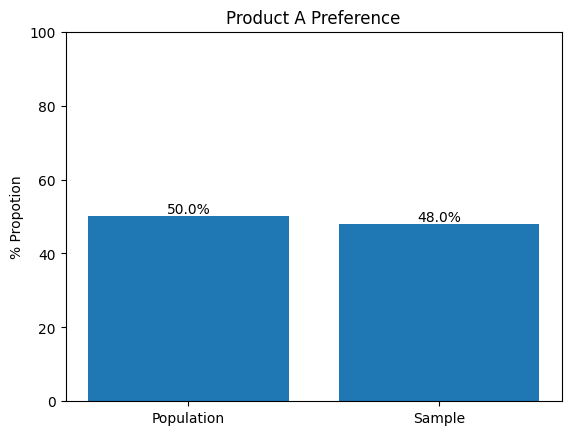

In [306]:
# product A proportion bar graph
pop_prop = 0.5*100
sample_prop = (sucess/sample_size)*100

plt.figure()
bars = plt.bar(['Population','Sample'],[pop_prop,sample_prop])
plt.title('Product A Preference')
plt.ylabel('% Propotion')
plt.ylim([0,100])

# bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,
             f'{height:.1f}%',
             ha='center',va='bottom')
plt.show()

In [307]:
# left-tailed test
# Ho: P1 >= 0.5
# Ha: P1 < 0.5
results = stats.binomtest(
    k = 600,
    n = 1250,
    p = 0.5,
    alternative = 'less'
)

In [308]:
results

BinomTestResult(k=600, n=1250, alternative='less', statistic=0.48, pvalue=0.08287126424198196)

In [309]:
# probability value
p_value = results.pvalue
p_value

np.float64(0.08287126424198196)

In [310]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("Product A does not meet 50% expectation.")
else:
    # fail to reject null hypothesis
    print("Product A meets 50% expectation.")

Product A meets 50% expectation.


## Power


In [311]:
# parameters
pop_prop = 0.5
sucess = 600
sample_size = 1250

sample_prop = sucess/sample_size
cohen_h = abs(proportion_effectsize(sample_prop, pop_prop))

# calculate power
power = TTestPower().solve_power(
    effect_size = cohen_h,
    nobs = sample_size,
    alpha = 0.05,
)
power

np.float64(0.29274580703748226)

In [312]:
# 80% power sample size
sample_80p = TTestPower().solve_power(
    effect_size = cohen_h,
    power = 0.8,
    alpha = 0.05,
)
sample_80p

4904.841769802132

# 2 Proportion Test

In [313]:
# two-tailed test
# Ho: Board A = Board B
# Ha: Board A != Board B
success_A = 35
success_B = 25
sample_A = 150
sample_B = 120

z_stat, p_value = proportions_ztest(
    count = [success_A, success_B],
    nobs = [sample_A, sample_B],
)

In [314]:
# test statistic
z_stat

np.float64(0.49099025303098276)

In [315]:
# probability value
p_value

np.float64(0.6234333413821049)

In [316]:
# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Board A is different from Board B.")
else:
    # fail to reject null hypothesis
    print("There is no significant deference between Board A and Board B.")

There is no significant deference between Board A and Board B.


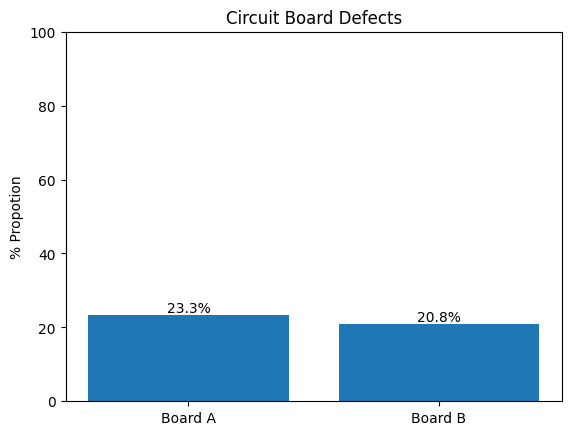

In [317]:
# circuit board defects proportion bar graph
board_A = (success_A/sample_A)*100
board_B = (success_B/sample_B)*100

plt.figure()
bars = plt.bar(['Board A','Board B'],[board_A,board_B])
plt.title('Circuit Board Defects')
plt.ylabel('% Propotion')
plt.ylim([0,100])

# bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,
             f'{height:.1f}%',
             ha='center',va='bottom')
plt.show()

In [318]:
# right-tailed test
# Ho: Board A <= Board B
# Ha: Board A > Board B
success_A, success_B = 35, 25
sample_A, sample_B = 150, 120

z_stat, p_value = proportions_ztest(
    count = [success_A, success_B],
    nobs = [sample_A, sample_B],
    alternative = 'larger'
    
)

In [319]:
# test statistic
z_stat

np.float64(0.49099025303098276)

In [320]:
# probability value
p_value

np.float64(0.31171667069105247)

In [321]:
# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Board A is different from Board B.")
else:
    # fail to reject null hypothesis
    print("There is no significant deference between Board A and Board B.")

There is no significant deference between Board A and Board B.


## Power

In [322]:
# parameters
success_A, success_B = 35, 25
sample_A, sample_B = 150, 120

prop_A = success_A/sample_A
prop_B = success_B/sample_B

cohen_h = abs(proportion_effectsize(prop_A, prop_B))

# calculate power
power = TTestIndPower().solve_power(
    effect_size = cohen_h,
    nobs1 = sample_A,
    ratio = sample_B/sample_A, # with respect to sample 2
    alpha = 0.05
)
power

np.float64(0.07798788656308094)

In [323]:
# 80% power sample size
sample_80p = TTestIndPower().solve_power(
    effect_size = cohen_h,
    power = 0.8,
    ratio = sample_B/sample_A, # with respect to sample 2
    alpha = 0.05
)
sample_80p

4859.471580649569

# ANOM

In [324]:
# Hypothesis
# Ho: equal proportions
# Ha: at least 1 is different
success_A = 35
success_B = 25
success_C = 30
trial_A = 150
trial_B = 120
trial_C = 85

chi_stat, p_value, table = proportions_chisquare(
    count = [success_A, success_B, success_C],
    nobs = [trial_A, trial_B, trial_C],
)

In [325]:
# test statistic
chi_stat

np.float64(6.057305154766307)

In [326]:
# probability value
p_value

np.float64(0.048380783589005064)

In [327]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("At least 1 of the board is different.")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between the boards.")

At least 1 of the board is different.


In [328]:
# Boards defect rate
print("Board A: " + str(success_A/trial_A))
print("Board B: " + str(success_B/trial_B))
print("Board C: " + str(success_C/trial_C))

Board A: 0.23333333333333334
Board B: 0.20833333333333334
Board C: 0.35294117647058826


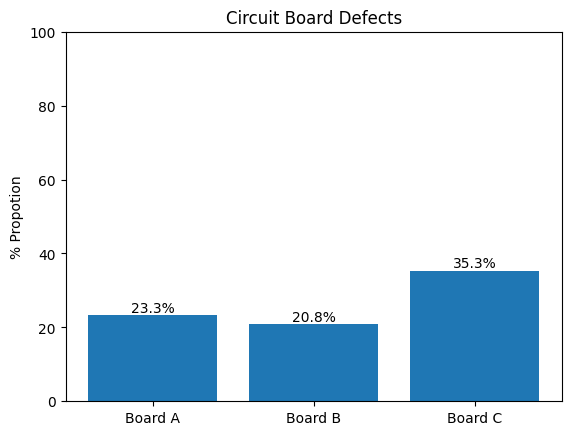

In [329]:
# circuit board defects proportion bar graph
board_A = (success_A/trial_A)*100
board_B = (success_B/trial_B)*100
board_C = (success_C/trial_C)*100

plt.figure()
bars = plt.bar(['Board A','Board B','Board C'],[board_A,board_B,board_C])
plt.title('Circuit Board Defects')
plt.ylabel('% Propotion')
plt.ylim([0,100])

# bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,
             f'{height:.1f}%',
             ha='center',va='bottom')
plt.show()